In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import spacy
import seaborn as sns
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [104]:
df = pd.read_csv('8_9.7_all_clean_vector.csv')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aggressor          1206 non-null   float64
 1   role               940 non-null    float64
 2   violence type      1631 non-null   float64
 3   location           1631 non-null   float64
 4   general location   1631 non-null   float64
 5   severity           656 non-null    float64
 6   emotion            524 non-null    float64
 7   care               232 non-null    float64
 8   factor             688 non-null    object 
 9   description        1622 non-null   object 
 10  response           1615 non-null   object 
 11  month              1631 non-null   int64  
 12  day                1631 non-null   int64  
 13  day_of_week        1631 non-null   int64  
 14  is_weekend         1631 non-null   int64  
 15  Moon Phase         1631 non-null   float64
 16  Full Moon          1631 

## Semantic Analysis

### Topic Modeling (see semantic_2 / fix miss)

### Sentiment Analysis

In [ ]:
df.head()

,aggressor,role,violence type,location,general location,severity,emotion,care,factor,description,...,Moon Phase,Full Moon,Precipitation,Temperature,factor_clean,topic,topic_label,description_clean,desc_topic,desc_topic_label
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,0.915367,1,8.3,25.50,homelessness lack housing,7,7_housing_homelessness_lack_,verbal assault push shoving harassment head bu...,21,21_harassment_verbal_assault_posture
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,0.915367,1,8.3,25.50,homelessness lack housing,7,7_housing_homelessness_lack_,verbal assault push shoving harassment head bu...,21,21_harassment_verbal_assault_posture
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,0.915367,1,8.3,25.50,homelessness lack housing,7,7_housing_homelessness_lack_,verbal assault push shoving harassment head bu...,21,21_harassment_verbal_assault_posture
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,0.915367,1,8.3,25.50,homelessness lack housing,7,7_housing_homelessness_lack_,verbal assault push shoving harassment head bu...,21,21_harassment_verbal_assault_posture
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,alter mental status inpatient bed unavailable,grab pinching scratch hair pull kicking hit be...,...,0.865656,0,0.0,31.55,alter mental status inpatient bed unavailable,12,12_psychiatric_bed_care_removal,grab pinching scratch hair pull kicking hit be...,23,23_verbal_pinching_hair_assault


In [ ]:
df['sentiment_score'].value_counts()

KeyError: 'sentiment_score'

In [ ]:
# Initialize sentiment pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Analyze sentiment for descriptions
df["sentiment"] = df["description"].apply(lambda x: sentiment_analyzer(x[:512])[0]["label"])

# Map sentiment to numerical scores (negative=0, neutral=1, positive=2)
df["sentiment_score"] = df["sentiment"].map({"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2})

In [ ]:
df.to_csv('8_9.7_all_clean_vector_sentiment.desc.csv', index=False)

### Response Action Clustering (FUTURE)

In [106]:
# Convert all responses to strings, keeping NaN as NaN
df["response"] = df["response"].apply(lambda x: str(x) if pd.notna(x) else x)

# Cluster responses (BERTopic automatically ignores NaN)
response_model = BERTopic(language="english")
response_topics, _ = response_model.fit_transform(df["response"].astype(str))  # Force string conversion
df["response_cluster"] = response_topics

# Special handling for NaN (BERTopic returns -1 for these)
df.loc[df["response"].isna(), "response_cluster"] = np.nan  # Optional: Mark NaN explicitly

In [80]:
# # Cluster response actions (e.g., using BERTopic again)
# response_model = BERTopic(language="english")
# response_topics, _ = response_model.fit_transform(df["response"])
# df["response_cluster"] = response_topics

TypeError: sequence item 0: expected str instance, float found

In [107]:
df['response_cluster'].unique()

array([48., 15., 31., -1., 49., 10., 30., 53., 13.,  5., 34., 32.,  2.,
       42., 19.,  4.,  7., 52., 43.,  8., 45., 21., 33., 18., 17., 22.,
       44., 40., 47., 35., 46., 25.,  9., 12.,  3., 14.,  1., 27.,  0.,
       41., 29., 16., 36., nan, 24., 50.,  6., 26., 37., 23., 11., 20.,
       39., 28., 51.])

## Exploratory Data Analysis (EDA)

### Topic-Severity Correlation (IGNORE)

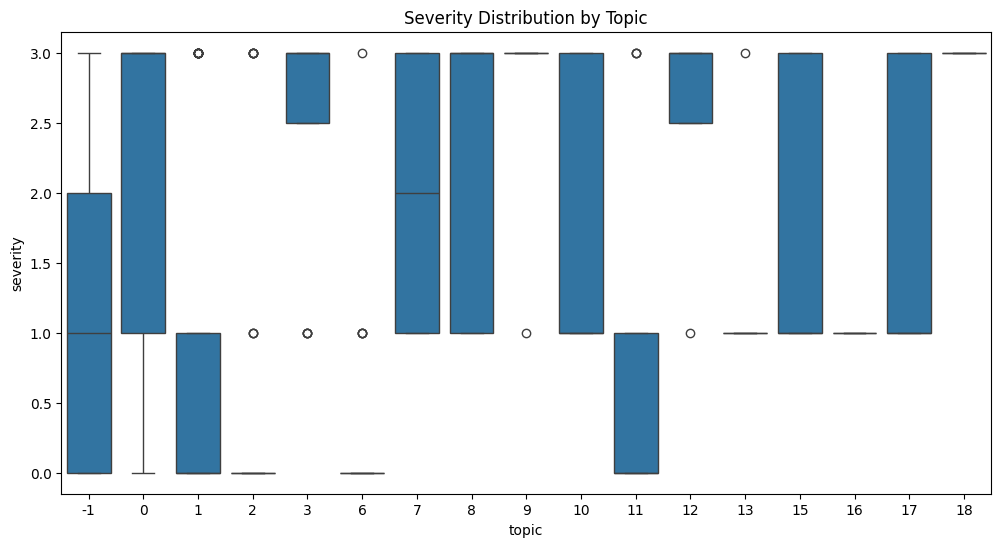

In [ ]:
# Plot topic distribution by severity
plt.figure(figsize=(12, 6))
sns.boxplot(x="topic", y="severity", data=df)
plt.title("Severity Distribution by Topic")
plt.show()

### Structured Feature Correlations

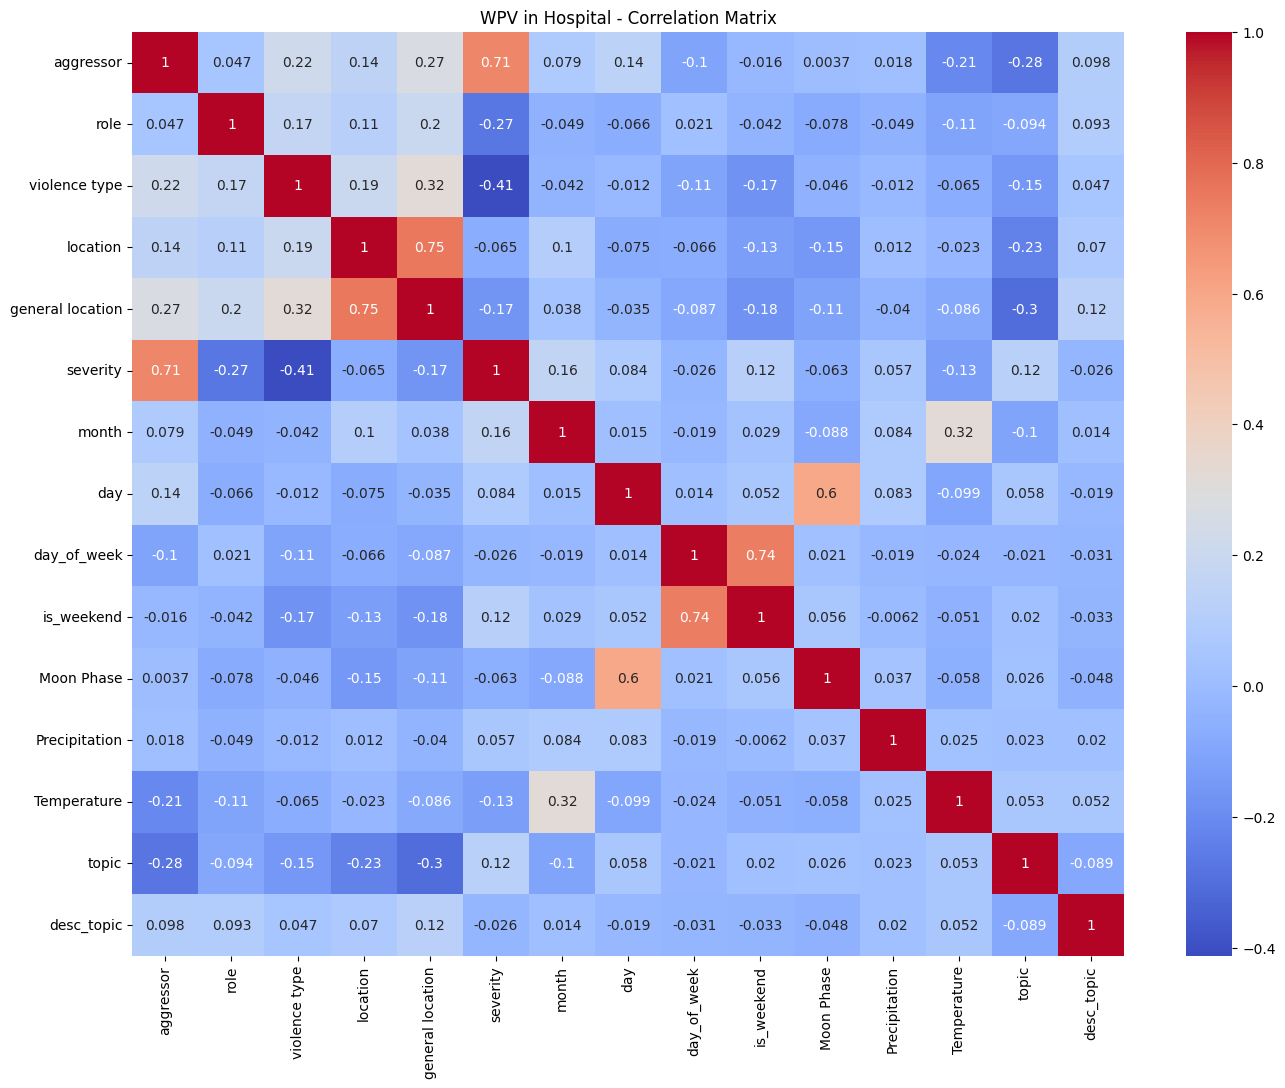

In [83]:
# With nan in dataset
# Heatmap of correlations
plt.figure(figsize=(16, 12))
corr_matrix = df[["aggressor", "role", "violence type", "location", "general location", "severity", "month", "day", "day_of_week", "is_weekend",
                  "Moon Phase", "Precipitation", "Temperature", "topic", "desc_topic"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("WPV in Hospital - Correlation Matrix")
plt.show()

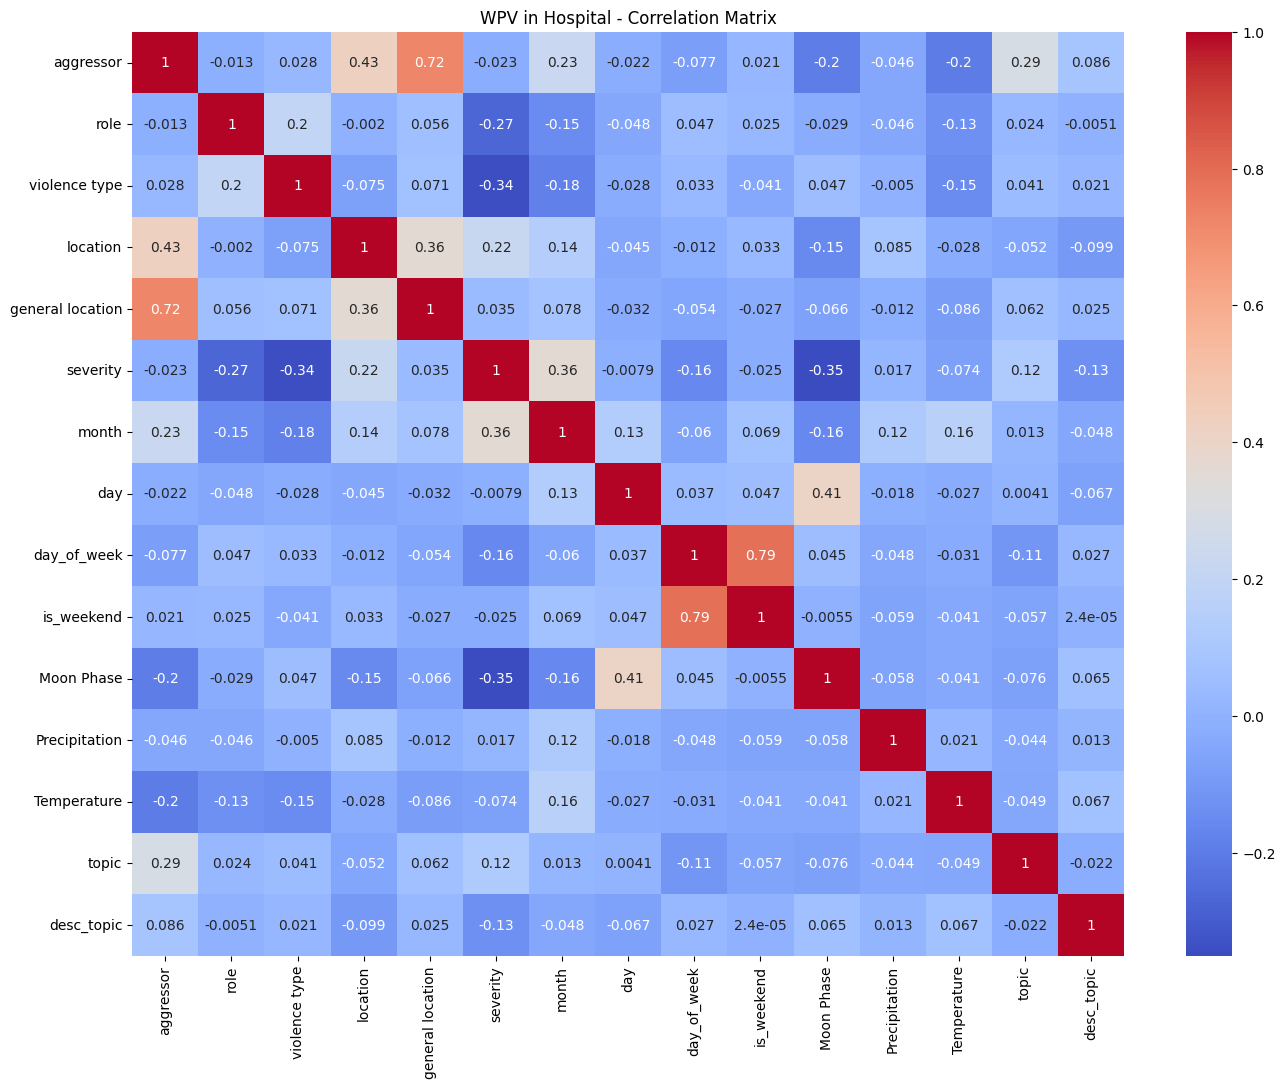

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(16, 12))
corr_matrix = df[["aggressor", "role", "violence type", "location", "general location", "severity", "month", "day", "day_of_week", "is_weekend",
                  "Moon Phase", "Precipitation", "Temperature", "topic", "desc_topic"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("WPV in Hospital - Correlation Matrix")
plt.show()

In [ ]:
df['role'].unique()

array([ 0.,  2.,  1.,  4., nan,  3.])

In [ ]:
df.head()

,aggressor,role,violence type,location,general location,severity,emotion,care,factor,description,...,Temperature,factor_clean,topic,topic_label,desc_clean,desc_topic,desc_topic_label,sentiment,sentiment_score,response_cluster
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,alter mental status inpatient bed unavailable,grab pinching scratch hair pull kicking hit be...,...,31.55,alter mental status inpatient bed unavailable,11,"psychiatric, guardian, abandon",grab pinching scratch hair pull kicking hit be...,5,"verbal, pinching, hair",NEGATIVE,0,4


## Feature Engineering

In [108]:
# One-hot encode topics and response clusters
topic_dummies = pd.get_dummies(df["topic"], prefix="topic")
topic_desc_dummies = pd.get_dummies(df["desc_topic"], prefix="description")
response_dummies = pd.get_dummies(df["response_cluster"], prefix="response")

# Combine all features
X = pd.concat([
    # df[["aggressor", "role", "violence type", "location", "is_weekend", "Precipitation", "Temperature"]],
    df[["aggressor", "role", "violence type", "location", "is_weekend", "Precipitation", "Temperature", "Moon Phase"]],
    topic_dummies,
    topic_desc_dummies,
    response_dummies,
    # df["sentiment_score"]
], axis=1)

y = df["severity"]

In [86]:
df[["aggressor", "role", "violence type", "location", "is_weekend", "Moon Phase", "severity"]].isna().sum()

,0
aggressor,425
role,691
violence type,0
location,0
is_weekend,0
Moon Phase,0
severity,975


In [109]:
y.value_counts()

,count
severity,
0.0,322
1.0,153
3.0,127
2.0,54


In [ ]:
# # Drop rows where ANY column in X or y has NaN
# combined = pd.concat([X, y], axis=1)
# clean_mask = combined.notna().all(axis=1)  # Rows with no NaN anywhere
# X_clean = X[clean_mask]
# y_clean = y[clean_mask].astype(int)

In [ ]:
# # Check again for any NaN
# if y_clean.isna().any():
#     print("⚠️ y_clean still contains NaN values!")
# else:
#     print("✅ y_clean has no NaN values.")
# if X_clean.isna().any().any():
#     print("⚠️ X_clean still contains NaN values!")
# else:
#     print("✅ X_clean has no NaN values.")

✅ y_clean has no NaN values.
✅ X_clean has no NaN values.


## ML Predictive Modeling

In [110]:
y.value_counts()

,count
severity,
0.0,322
1.0,153
3.0,127
2.0,54


### Future

Not balance, so SMOTE in the future

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# y_clean = y_clean.astype(int)  # Convert from float to int

# # X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(
#     X_clean, y_clean,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_clean  # Maintain class balance
# )

In [114]:
y_train.value_counts()

,count
severity,
0.0,258
1.0,126
3.0,97
2.0,46


### Stat from New Data

In [135]:
import numpy as np
from sklearn.metrics import classification_report
import xgboost as xgb

# Replace NaN in both train and test targets with a new class (4)
y_train_filled = y_train.fillna(4)  # For pandas Series
y_test_filled = y_test.fillna(4)    # Must do the same for test set

# If using numpy arrays:
# y_train_filled = np.nan_to_num(y_train, nan=4)
# y_test_filled = np.nan_to_num(y_test, nan=4)

# Train model with 5 classes
model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=5  # Now includes 0-4
)
model.fit(X_train, y_train_filled)

# Predict and evaluate with processed y_test
y_pred = model.predict(X_test)
print(classification_report(y_test_filled, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        64
         1.0       0.25      0.19      0.21        27
         2.0       0.50      0.50      0.50         8
         3.0       0.41      0.40      0.41        30
         4.0       0.85      0.86      0.86       198

    accuracy                           0.78       327
   macro avg       0.59      0.59      0.59       327
weighted avg       0.77      0.78      0.77       327



In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Encode `y` to ensure consecutive labels (e.g., [0, 1, 2])
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# print("Unique classes after encoding:", np.unique(y_train_encoded))

Unique classes after encoding: [0 1 2]


<Figure size 1000x800 with 0 Axes>

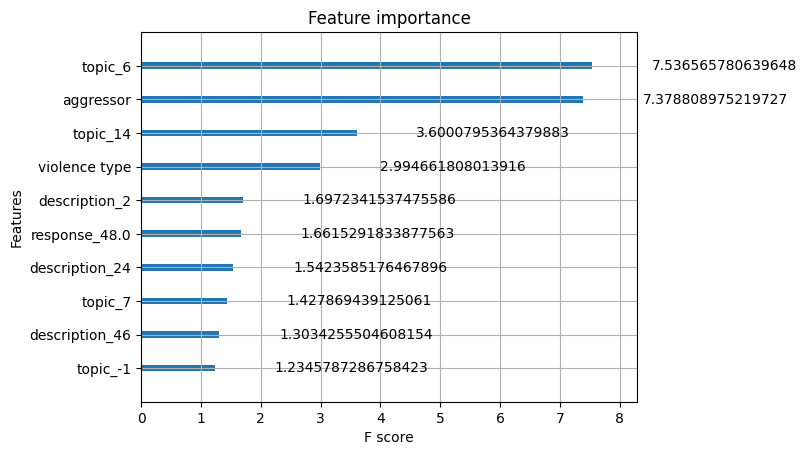

In [148]:
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='gain')
plt.show()

### Improve Graph

In [ ]:
df.head()

,aggressor,role,violence type,location,general location,severity,emotion,care,factor,description,...,Temperature,factor_clean,topic,topic_label,desc_clean,desc_topic,desc_topic_label,sentiment,sentiment_score,response_cluster
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,homelessness lack housing,verbal assault push shoving harassment head bu...,...,25.50,homelessness lack housing,6,"housing, homelessness, lack",verbal assault push shoving harassment head bu...,6,"verbal, assault, harassment",NEGATIVE,0,16
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,alter mental status inpatient bed unavailable,grab pinching scratch hair pull kicking hit be...,...,31.55,alter mental status inpatient bed unavailable,11,"psychiatric, guardian, abandon",grab pinching scratch hair pull kicking hit be...,5,"verbal, pinching, hair",NEGATIVE,0,4


In [ ]:
df2 = pd.read_csv('8_9.6_all_vector_factor.desc.csv')

In [ ]:
# Create a dictionary to map topic IDs to labels
topic_label_map = df2[['topic', 'topic_label']].drop_duplicates().set_index('topic')['topic_label'].to_dict()
desc_topic_label_map = df2[['desc_topic', 'desc_topic_label']].drop_duplicates().set_index('desc_topic')['desc_topic_label'].to_dict()

In [ ]:
desc_topic_label_map

{6: 'verbal, assault, harassment',
 5: 'verbal, pinching, hair',
 3: 'object, break, posturing',
 0: 'patient, staff, security',
 -1: 'Other (<2.5%)',
 9: 'Other (<2.5%)',
 1: 'elderly, confuse, pinching',
 7: 'scratch, pull, grab',
 4: 'bite, skin, restraint',
 10: 'Other (<2.5%)',
 2: 'grab, hair, scratch',
 8: 'object, throw, break'}

In [ ]:
# Get feature importance scores and names
importance_scores = model.feature_importances_
feature_names = X.columns  # From your feature matrix (X)

# Replace topic IDs with labels
def replace_topic_labels(feature_name):
    if 'topic_' in feature_name:
        topic_id = int(feature_name.split('_')[1])
        return topic_label_map.get(topic_id, feature_name)
    elif 'desc_topic_' in feature_name:
        topic_id = int(feature_name.split('_')[2])
        return desc_topic_label_map.get(topic_id, feature_name)
    else:
        return feature_name

# Apply renaming
feature_names_clean = [replace_topic_labels(f) for f in feature_names]

# Create a DataFrame for plotting
feature_importance = pd.DataFrame({
    'Feature': feature_names_clean,
    'Importance': importance_scores
}).sort_values('Importance', ascending=False)

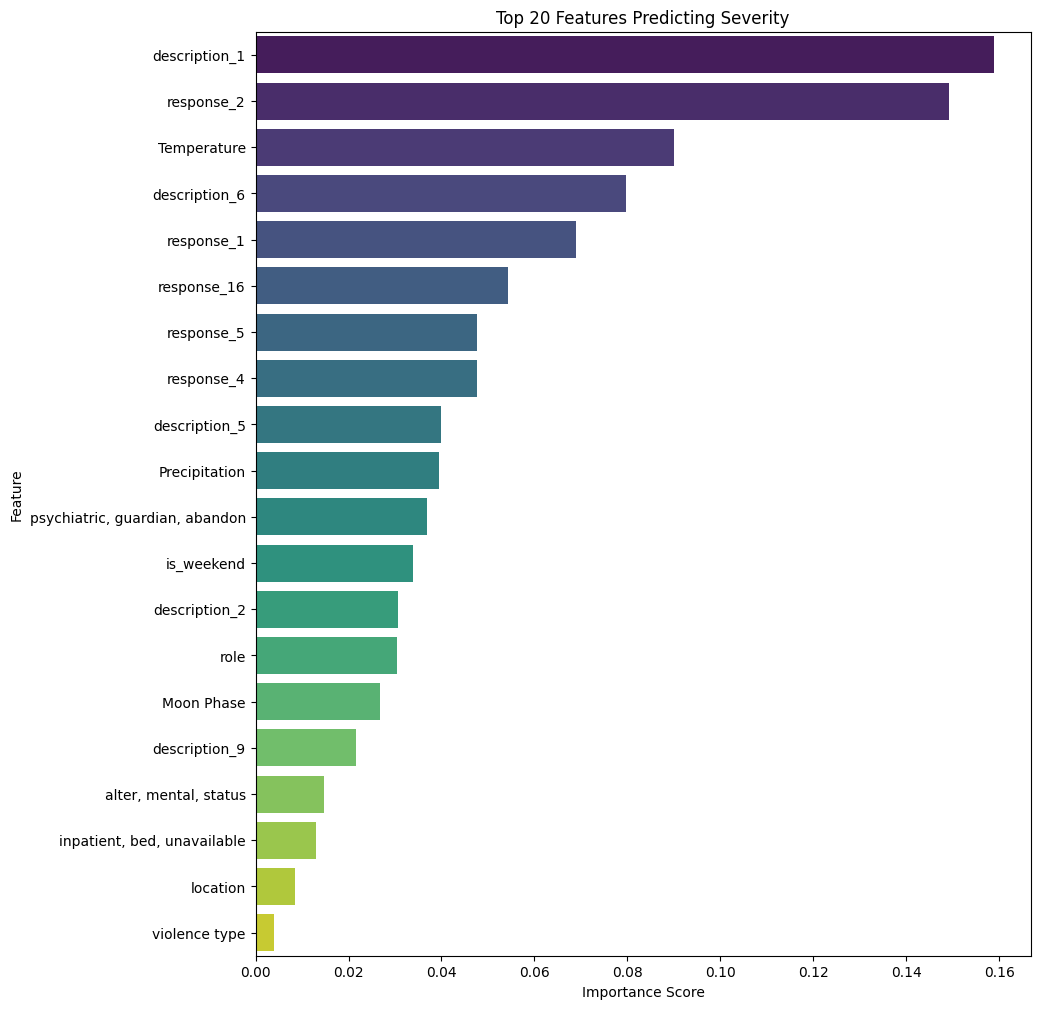

In [ ]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20), palette='viridis')
plt.title('Top 20 Features Predicting Severity')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Graph from New Data

=== CLASS STATISTICS (Excluding Class 4) ===
Original Test Samples: 327
After NaN Removal: 129 (198 NaN samples removed)

Class Distribution:
severity
0.0    64
1.0    27
2.0     8
3.0    30
Name: count, dtype: int64


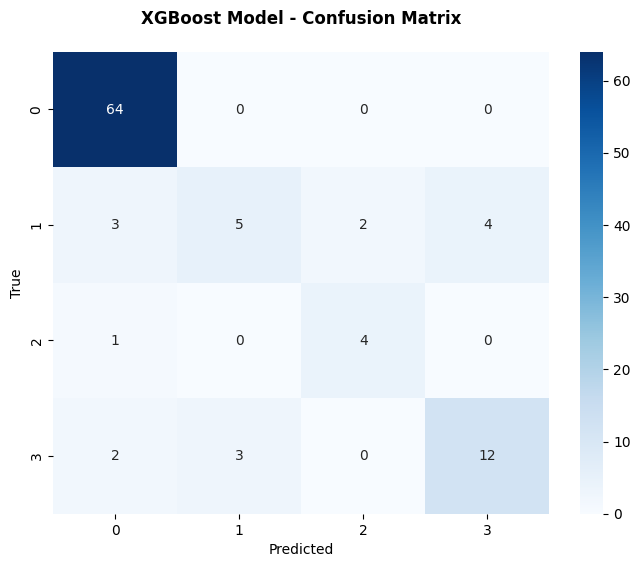


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        64
         1.0       0.62      0.19      0.29        27
         2.0       0.67      0.50      0.57         8
         3.0       0.75      0.40      0.52        30
         4.0       0.00      0.00      0.00         0

    accuracy                           0.66       129
   macro avg       0.59      0.42      0.47       129
weighted avg       0.80      0.66      0.69       129



In [127]:
from sklearn.metrics import confusion_matrix

# Filter out class 4
mask = (y_test_filled != 4)
y_test_filtered = y_test_filled[mask]
y_pred_filtered = y_pred[mask]

# Statistics
print("=== CLASS STATISTICS (Excluding Class 4) ===")
print(f"Original Test Samples: {len(y_test_filled)}")
print(f"After NaN Removal: {len(y_test_filtered)} ({len(y_test_filled)-len(y_test_filtered)} NaN samples removed)")
print("\nClass Distribution:")
print(pd.Series(y_test_filtered).value_counts().sort_index())

# Confusion Matrix
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=[0,1,2,3])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0','1','2','3'],
            yticklabels=['0','1','2','3'])
plt.title("XGBoost Model - Confusion Matrix", weight='bold', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test_filtered, y_pred_filtered))

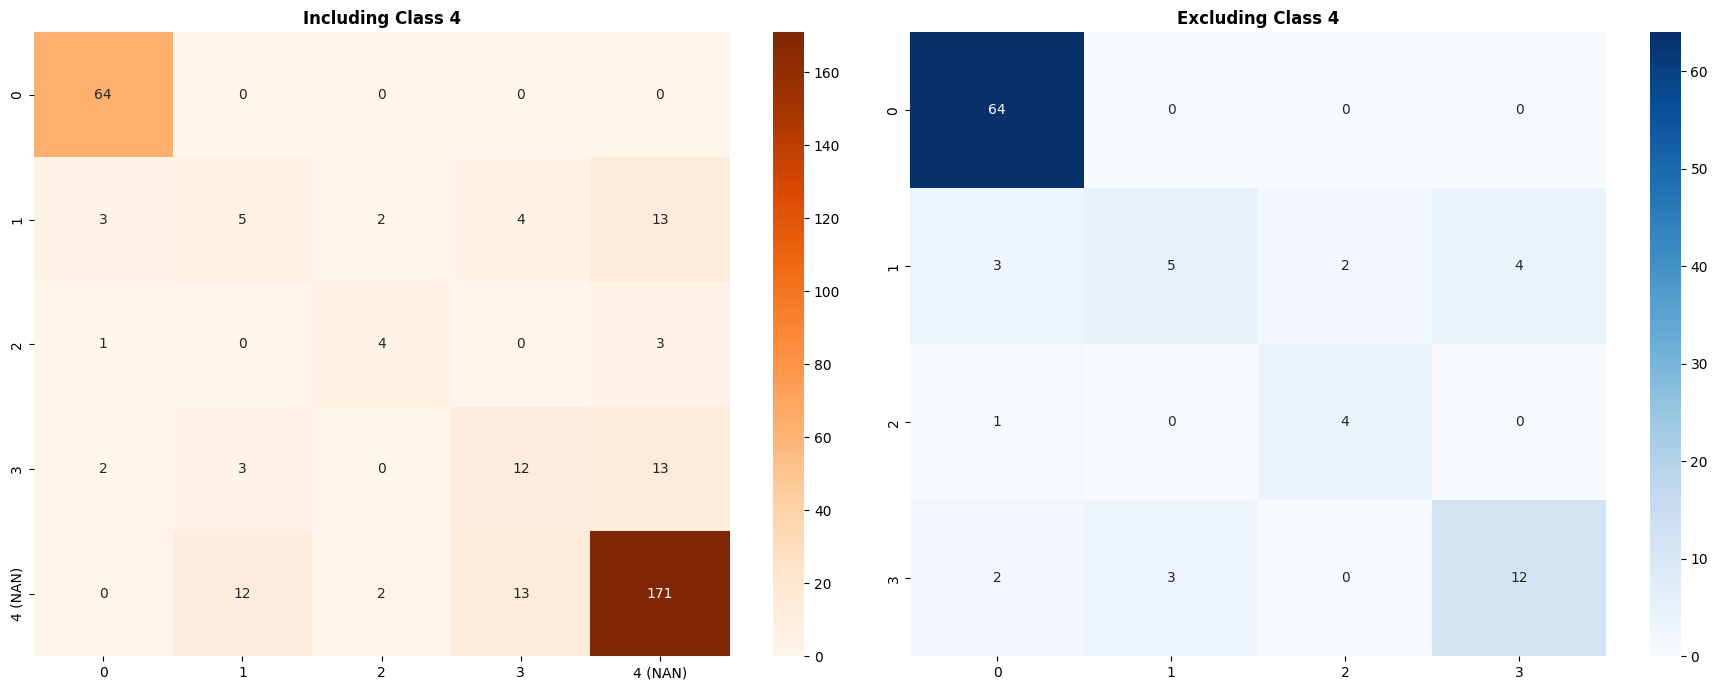

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

# With Class 4
cm_full = confusion_matrix(y_test_filled, y_pred)
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Oranges', ax=ax1,
           xticklabels=['0','1','2','3','4 (NAN)'],
           yticklabels=['0','1','2','3','4 (NAN)'])
ax1.set_title("Including Class 4", weight='bold')

# Without Class 4
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
           xticklabels=['0','1','2','3'],
           yticklabels=['0','1','2','3'])
ax2.set_title("Excluding Class 4", weight='bold')

plt.tight_layout()
plt.show()

=== AVERAGE PRECISION SCORES ===
   Class  Average Precision
0      0           0.914286
3      3           0.439535
2      2           0.364341
1      1           0.286283


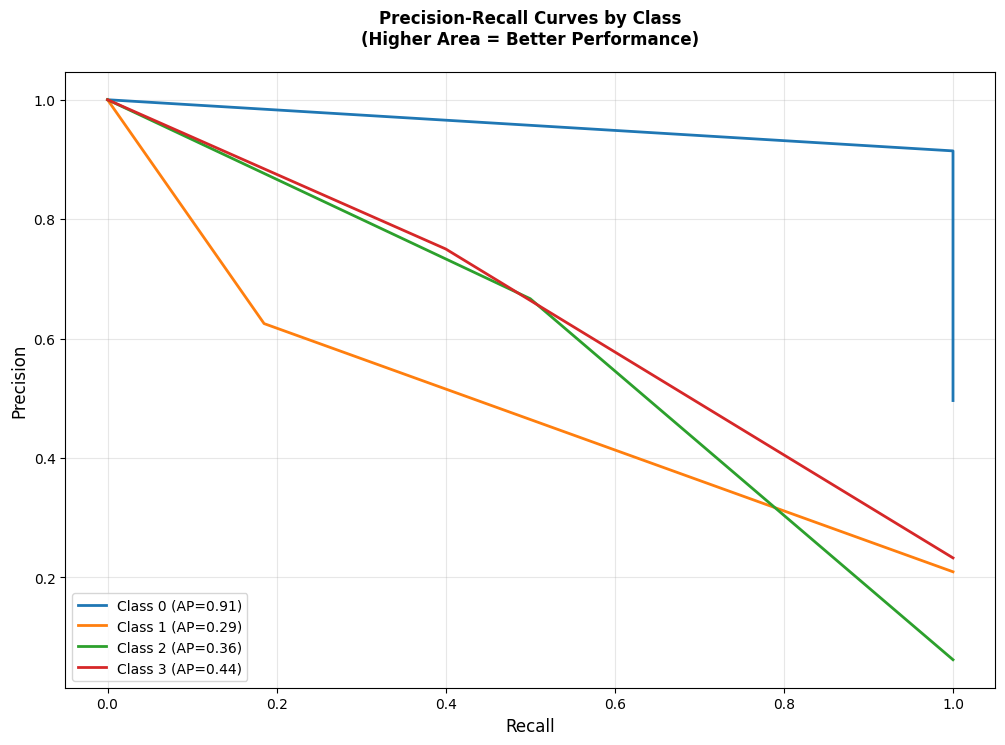

In [133]:
# Statistics and Visualization
plt.figure(figsize=(12,8))
print("=== AVERAGE PRECISION SCORES ===")
ap_scores = []

for i in range(4):  # Exclude class 4
    y_true_class = (y_test_filtered == i).astype(int)
    y_pred_class = (y_pred_filtered == i).astype(int)
    precision, recall, _ = precision_recall_curve(y_true_class, y_pred_class)
    ap = average_precision_score(y_true_class, y_pred_class)
    ap_scores.append(ap)

    plt.plot(recall, precision, lw=2, label=f'Class {i} (AP={ap:.2f})')

# Print AP statistics
ap_stats = pd.DataFrame({
    'Class': [0,1,2,3],
    'Average Precision': ap_scores
}).sort_values('Average Precision', ascending=False)
print(ap_stats)

# Plot formatting
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves by Class\n(Higher Area = Better Performance)", weight='bold', pad=20)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

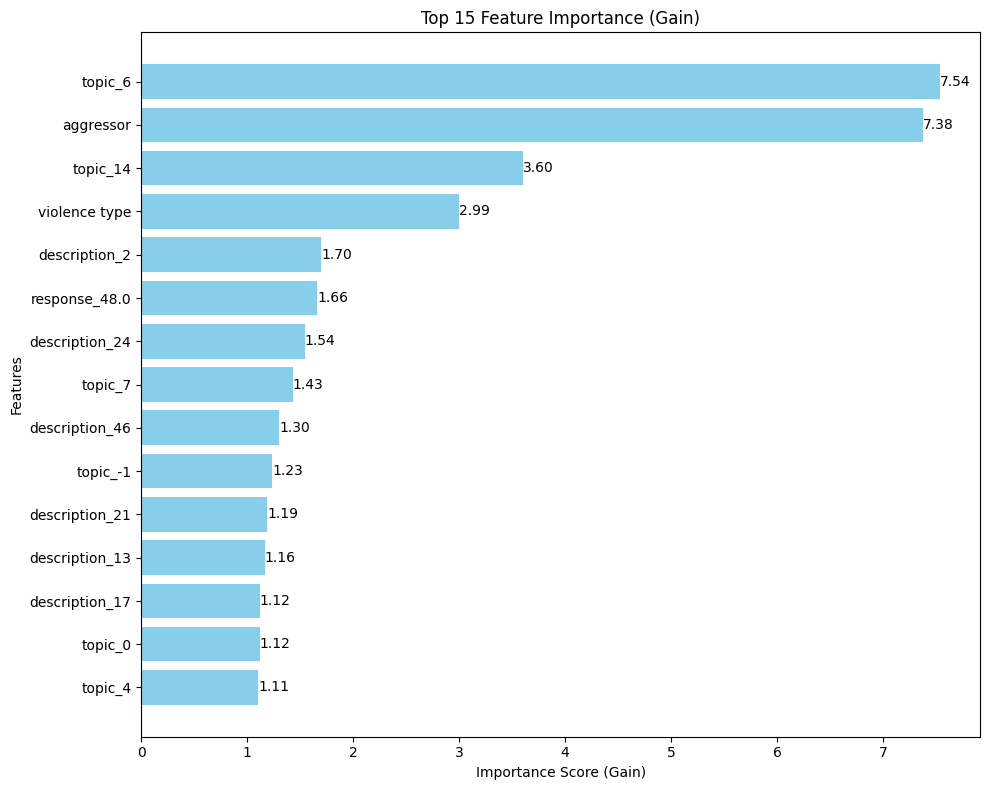

In [137]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

## Get feature importances
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
importance = model.get_booster().get_score(importance_type='gain')  # Using gain importance

# Create a DataFrame for easier manipulation
feature_importance = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values('importance', ascending=False)

# Get top 15 features
top_n = 15
top_features = feature_importance.head(top_n)

## Visualization
plt.figure(figsize=(10, 8))
plt.title(f'Top {top_n} Feature Importance (Gain)')

# Horizontal bar plot
bars = plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.gca().invert_yaxis()  # Most important at top

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', va='center')

plt.xlabel('Importance Score (Gain)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [142]:
df['topic_label'].unique()

array(['7_housing_homelessness_lack_', '12_psychiatric_bed_care_removal',
       '3_inpatient_bed_unavailable_snf',
       '2_alter_mental_status_understand',
       '17_detox_bed_unavailable_inpatient',
       '14_communication_cooperation_family_failure', '6_unknown___',
       '1_action_resident_patient_disorient',
       '-1_behavior_injurious_self_interference', '0_nan___',
       '9_agitated_misconduct_willful_action',
       '15_understand_lack_patient_trauma',
       '5_adherence_compliance_lack_patient',
       '16_altered_adherence_compliance_lack',
       '10_altered_confused_disorient_cognitive',
       '8_staff_insufficient_task_issue',
       '20_placement_pnmi_residential_understanding',
       '18_agitate_cognitive_impairment_capacity',
       '11_compliance_adherence_patient_lack',
       '19_compliance_adherence_lack_alter', '13_nan___', '4_unknown___'],
      dtype=object)

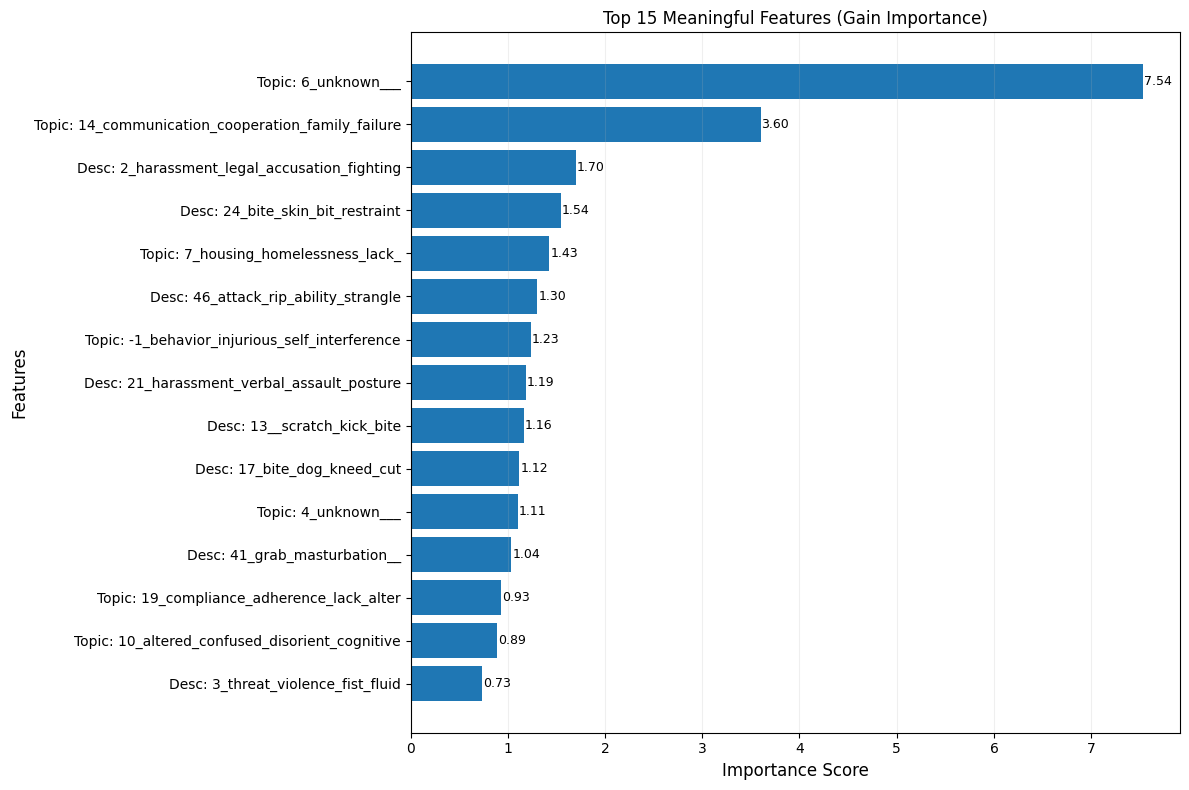

In [145]:
# Improve: remove nan
import re
import matplotlib.pyplot as plt

# Create mappings excluding NaN labels and convert to strings
topic_map = (
    df[['topic', 'topic_label']]
    .dropna(subset=['topic_label'])
    .drop_duplicates()
    .astype({'topic': int, 'topic_label': str})
    .set_index('topic')['topic_label']
    .to_dict()
)

desc_map = (
    df[['desc_topic', 'desc_topic_label']]
    .dropna(subset=['desc_topic_label'])
    .drop_duplicates()
    .astype({'desc_topic': int, 'desc_topic_label': str})
    .set_index('desc_topic')['desc_topic_label']
    .to_dict()
)

def map_feature_names(feature_name):
    """Replace feature names with cleaned labels after validation"""
    original = feature_name
    label = None
    prefix = ''

    try:
        if feature_name.startswith('topic_'):
            num = int(feature_name.split('_')[1])
            label = topic_map.get(num)
            prefix = 'Topic: '
        elif feature_name.startswith('description_'):
            num = int(feature_name.split('_')[1])
            label = desc_map.get(num)
            prefix = 'Desc: '
    except (ValueError, IndexError):
        return original

    if not label:
        return original

    # Clean label: remove 'nan' substrings and whitespace
    cleaned = re.sub(r'nan', '', label, flags=re.IGNORECASE).strip()

    # Check for meaningless patterns (e.g., 0___)
    if not cleaned or re.match(r'^\d+_+$', cleaned):
        return original

    return f"{prefix}{cleaned}"

# Apply mapping and filter
feature_importance['feature_label'] = feature_importance['feature'].apply(map_feature_names)
filtered_importance = feature_importance[feature_importance['feature_label'] != feature_importance['feature']]

# Get top 15 meaningful features
top_n = 15
top_features = filtered_importance.head(top_n)

# Visualization
plt.figure(figsize=(12, 8))
plt.title(f'Top {len(top_features)} Meaningful Features (Gain Importance)')

bars = plt.barh(top_features['feature_label'], top_features['importance'],
               color='#1f77b4', height=0.8)
plt.gca().invert_yaxis()

# Customize labels
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', va='center',
             fontsize=9)

plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

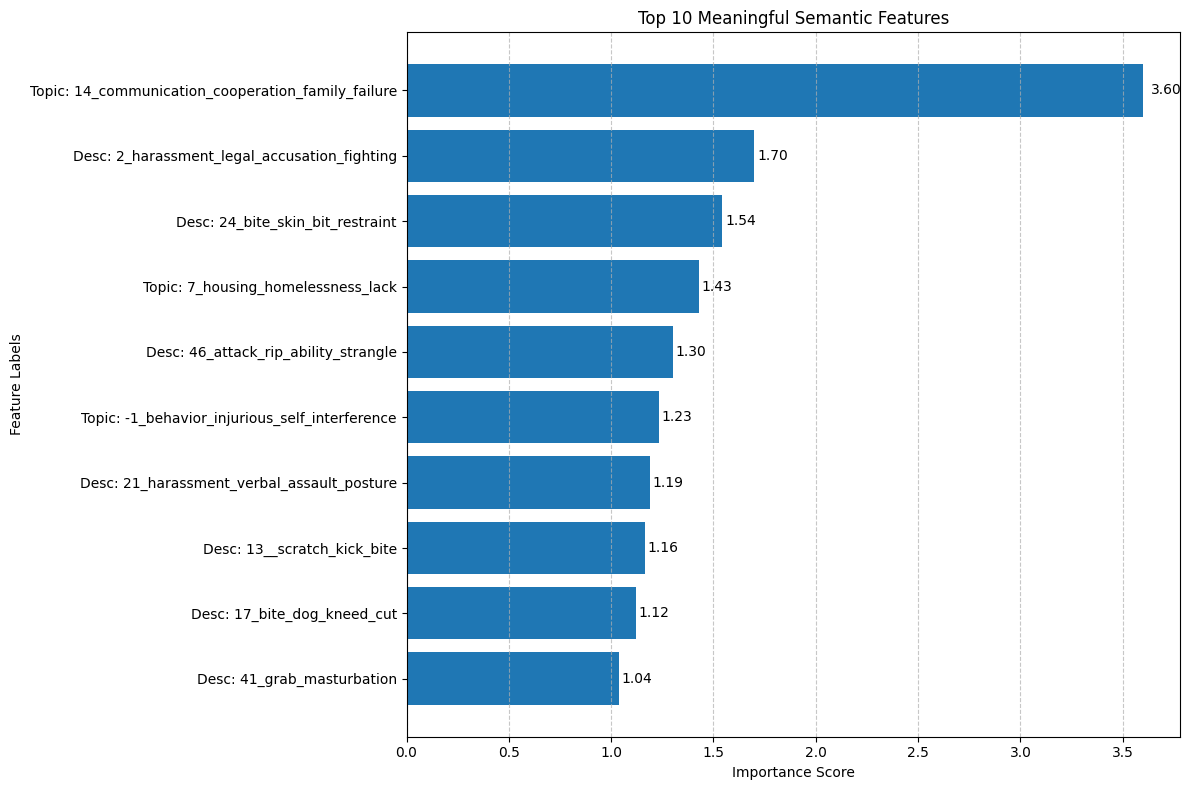

In [154]:
# Improve: remove nan & unknown
import re

# Create mapping dictionaries (same as before)
topic_map = df[['topic', 'topic_label']].drop_duplicates().set_index('topic')['topic_label'].to_dict()
desc_map = df[['desc_topic', 'desc_topic_label']].drop_duplicates().set_index('desc_topic')['desc_topic_label'].to_dict()

def clean_label(label):
    """Remove nan/unknown substrings and validate meaningful content"""
    # Remove 'nan' and 'unknown' case-insensitively
    cleaned = re.sub(r'(nan|unknown)', '', label, flags=re.IGNORECASE).strip(' _')
    # Check for meaningful content (at least one letter)
    return cleaned if re.search(r'[A-Za-z]', cleaned) else None

def map_feature_names(feature_name):
    """Enhanced mapping with cleaning and validation"""
    # Extract numeric part
    parts = feature_name.split('_')
    if len(parts) < 2: return None

    try:
        num = int(parts[1])
    except ValueError:
        return None

    # Get base label from appropriate map
    if feature_name.startswith('topic_'):
        raw_label = topic_map.get(num, f'unknown_{num}')
        prefix = "Topic: "
    elif feature_name.startswith('description_'):
        raw_label = desc_map.get(num, f'unknown_{num}')
        prefix = "Desc: "
    else:
        return None

    # Clean and validate label
    final_label = clean_label(raw_label)
    return f"{prefix}{final_label}" if final_label else None

# Apply mapping and filter
feature_importance['feature_label'] = feature_importance['feature'].apply(map_feature_names)
valid_features = feature_importance.dropna(subset=['feature_label']).sort_values('importance', ascending=False)

# Plot top N valid features
top_n = 10
top_valid = valid_features.head(top_n)

plt.figure(figsize=(12, 8))
plt.title(f'Top {len(top_valid)} Meaningful Semantic Features')

bars = plt.barh(top_valid['feature_label'], top_valid['importance'], color='#1f77b4')
plt.gca().invert_yaxis()

# Add value annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', va='center')

plt.xlabel('Importance Score')
plt.ylabel('Feature Labels')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

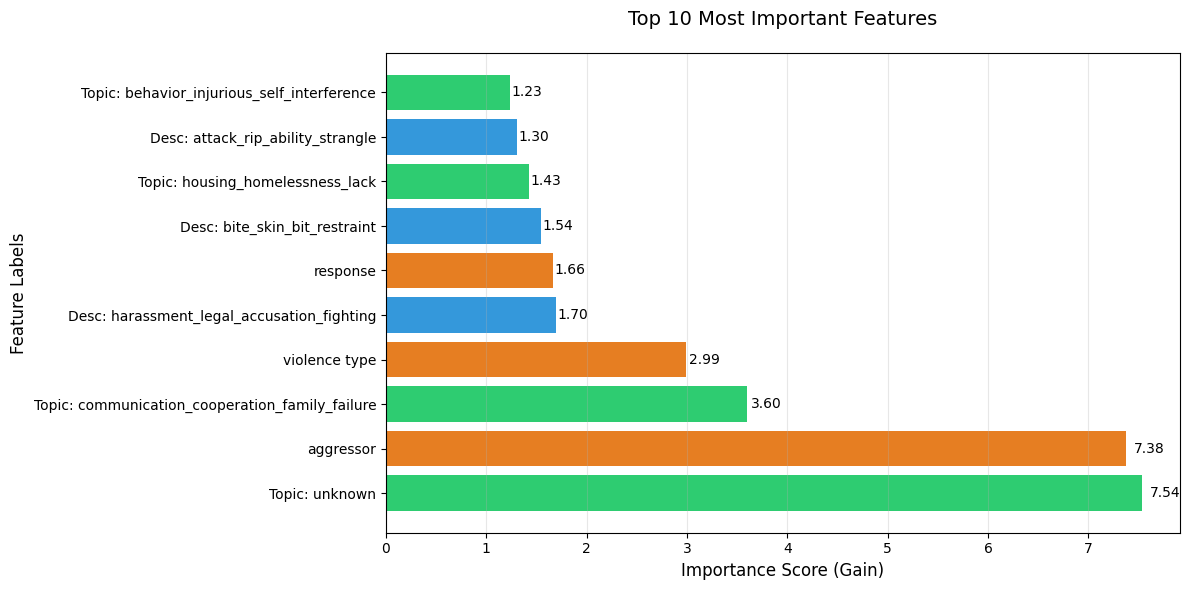

In [155]:
# Process all features
feature_importance['feature_label'] = feature_importance['feature'].apply(map_all_features)

# Filter and sort
valid_features = (feature_importance
                  .dropna(subset=['feature_label'])
                  .sort_values('importance', ascending=False))

# Select top 10 meaningful features
top_n = 10
top_valid = valid_features.head(top_n)

# Visualization
plt.figure(figsize=(12, 6))
plt.title(f'Top {top_n} Most Important Features', fontsize=14, pad=20)

bars = plt.barh(top_valid['feature_label'][::-1],  # Reverse for descending order
               top_valid['importance'][::-1],
               color=['#2ecc71' if 'Topic:' in x else '#3498db' if 'Desc:' in x else '#e67e22'
                      for x in top_valid['feature_label'][::-1]])

plt.gca().invert_yaxis()  # Keep highest importance at top
plt.xlabel('Importance Score (Gain)', fontsize=12)
plt.ylabel('Feature Labels', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add importance values
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

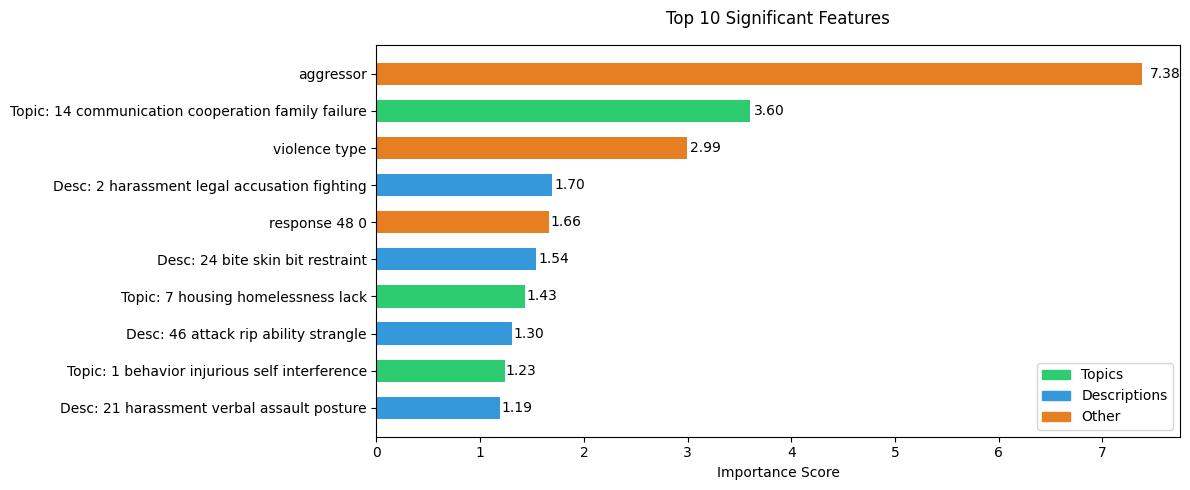

Filtered out 2 features with unknown/nan labels


In [160]:
def clean_label(label):
    """Strict label cleaning that completely removes any unknown-containing labels"""
    if pd.isna(label):
        return None

    label_str = str(label).strip(' _-')

    # Completely reject labels containing unknown/nan
    if re.search(r'\b(nan|unknown)\b', label_str, re.IGNORECASE):
        return None

    # Clean remaining labels
    cleaned = re.sub(r'[^a-zA-Z0-9]+', ' ', label_str).strip()
    return cleaned if cleaned and re.search(r'[a-zA-Z]', cleaned) else None

def map_feature_name(feature_name):
    """Strict mapping that excludes any features with unknown components"""
    # Handle numeric features
    if re.match(r'^[0-9_]+$', str(feature_name)):
        return None

    # Handle topic features
    if feature_name.startswith('topic_'):
        try:
            topic_num = int(feature_name.split('_')[1])
            raw_label = topic_map.get(topic_num)
            if raw_label is None or 'unknown' in str(raw_label).lower():
                return None
            cleaned = clean_label(raw_label)
            return f"Topic: {cleaned}" if cleaned else None
        except (ValueError, IndexError):
            return None

    # Handle description features
    elif feature_name.startswith('description_'):
        try:
            desc_num = int(feature_name.split('_')[1])
            raw_label = desc_map.get(desc_num)
            if raw_label is None or 'unknown' in str(raw_label).lower():
                return None
            cleaned = clean_label(raw_label)
            return f"Desc: {cleaned}" if cleaned else None
        except (ValueError, IndexError):
            return None

    # Handle other features
    else:
        if 'unknown' in str(feature_name).lower():
            return None
        cleaned = clean_label(feature_name)
        return cleaned if cleaned else None

# Apply strict filtering
feature_importance['clean_label'] = feature_importance['feature'].apply(map_feature_name)
valid_features = feature_importance.dropna(subset=['clean_label']).sort_values('importance', ascending=False)

# Get top features (may be less than 10 if many were filtered)
top_features = valid_features.head(10)

# Visualization
plt.figure(figsize=(12, 0.5 * len(top_features)))
ax = plt.subplot()

colors = {
    'Topic:': '#2ecc71',
    'Desc:': '#3498db',
    'other': '#e67e22'
}

for i, (_, row) in enumerate(top_features.iterrows()):
    prefix = row['clean_label'].split(':')[0] + ':' if ':' in row['clean_label'] else 'other'
    color = colors.get(prefix, colors['other'])
    ax.barh(i, row['importance'], color=color, height=0.6)
    ax.text(row['importance'] * 1.01, i,
           f'{row["importance"]:.2f}',
           va='center', ha='left')

ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['clean_label'])
ax.invert_yaxis()
ax.set_xlabel('Importance Score')
ax.set_title(f'Top {len(top_features)} Significant Features', pad=15)

# Only show legend if we have multiple types
if top_features['clean_label'].str.contains(':').any():
    legend_elements = []
    if top_features['clean_label'].str.startswith('Topic:').any():
        legend_elements.append(plt.Rectangle((0,0),1,1, color=colors['Topic:'], label='Topics'))
    if top_features['clean_label'].str.startswith('Desc:').any():
        legend_elements.append(plt.Rectangle((0,0),1,1, color=colors['Desc:'], label='Descriptions'))
    legend_elements.append(plt.Rectangle((0,0),1,1, color=colors['other'], label='Other'))
    if len(legend_elements) > 1:
        ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# Show message if features were filtered
original_count = len(feature_importance)
filtered_count = len(valid_features)
if filtered_count < original_count:
    print(f"Filtered out {original_count - filtered_count} features with unknown/nan labels")

Original features: 109
Features after cleaning: 107

Final labels shown:
                                        aggressor
Factor:  communication cooperation family failure
                                    violence type
      Desc:  harassment legal accusation fighting
                                       response  
                   Desc:  bite skin bit restraint
               Factor:  housing homelessness lack
               Desc:  attack rip ability strangle
    Factor:  behavior injurious self interference
         Desc:  harassment verbal assault posture


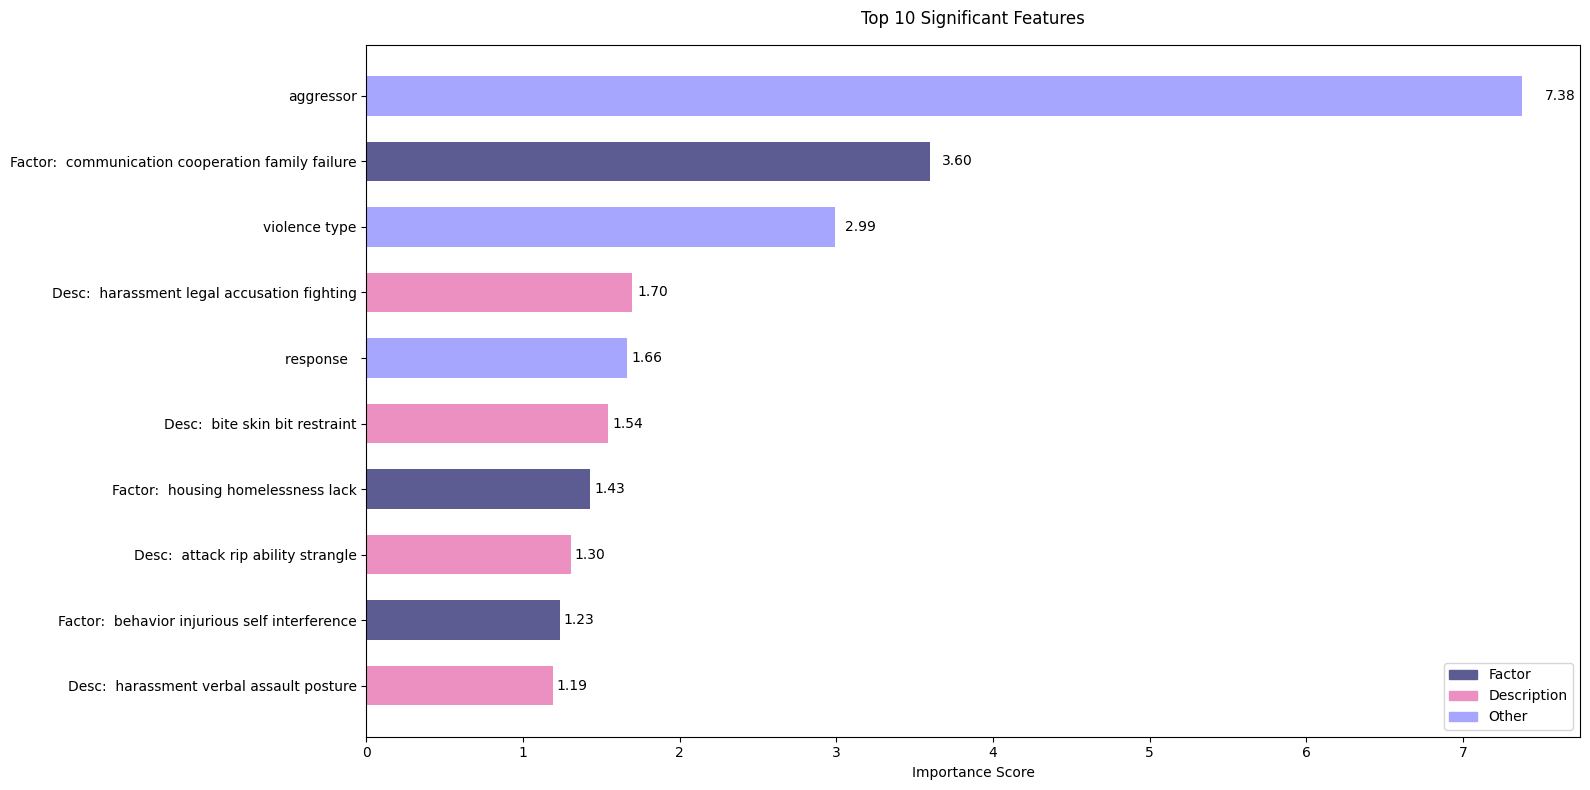

In [186]:
import string

def clean_label(label):
    """Strict label cleaning that completely removes any unknown-containing labels"""
    if pd.isna(label):
        return None

    label_str = str(label).strip(' _-')

    # Completely reject labels containing unknown/nan
    if re.search(r'\b(nan|unknown)\b', label_str, re.IGNORECASE):
        return None

    # Clean remaining labels
    cleaned = re.sub(r'[^a-zA-Z0-9]+', ' ', label_str).strip()
    return cleaned if cleaned and re.search(r'[a-zA-Z]', cleaned) else None

def map_feature_name(feature_name):
    """Strict mapping that excludes any features with unknown components"""
    # Handle numeric features
    if re.match(r'^[0-9_]+$', str(feature_name)):
        return None

    # Handle topic features
    if feature_name.startswith('topic_'):
        try:
            topic_num = int(feature_name.split('_')[1])
            raw_label = topic_map.get(topic_num)
            if raw_label is None or 'unknown' in str(raw_label).lower():
                return None
            cleaned = clean_label(raw_label)
            cleaned = cleaned.translate(str.maketrans('', '', string.digits))
            return f"Factor: {cleaned}" if cleaned else None
        except (ValueError, IndexError):
            return None

    # Handle description features
    elif feature_name.startswith('description_'):
        try:
            desc_num = int(feature_name.split('_')[1])
            raw_label = desc_map.get(desc_num)
            if raw_label is None or 'unknown' in str(raw_label).lower():
                return None
            cleaned = clean_label(raw_label)
            cleaned = cleaned.translate(str.maketrans('', '', string.digits))
            return f"Desc: {cleaned}" if cleaned else None
        except (ValueError, IndexError):
            return None

    # Handle other features
    else:
        if 'unknown' in str(feature_name).lower():
            return None
        cleaned = clean_label(feature_name)
        cleaned = cleaned.translate(str.maketrans('', '', string.digits))
        return cleaned if cleaned else None


# Apply strict filtering
feature_importance['clean_label'] = feature_importance['feature'].apply(map_feature_name)
valid_features = feature_importance.dropna(subset=['clean_label']).sort_values('importance', ascending=False)

# Get top features (may be less than 10 if many were filtered)
top_features = valid_features.head(10)

# Visualization
plt.figure(figsize=(16, 0.8 * len(top_features)))
ax = plt.subplot()

# Plot bars
for i, (_, row) in enumerate(top_features.iterrows()):
    color = '#5d5c92' if row['clean_label'].startswith('Factor:') else \
            '#eb90c0' if row['clean_label'].startswith('Desc:') else \
            '#a6a6ff'
    ax.barh(i, row['importance'], color=color, height=0.6)
    ax.text(row['importance'] * 1.02, i,
           f'{row["importance"]:.2f}',
           va='center', ha='left')

colors = {
    'Topic:': '#5d5c92',
    'Desc:': '#eb90c0',
    'other': '#a6a6ff'
}

# Finalize plot
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['clean_label'])
ax.invert_yaxis()
ax.set_xlabel('Importance Score')
ax.set_title(f'Top {len(top_features)} Significant Features', pad=15)

# Only show legend if we have multiple types
if top_features['clean_label'].str.contains(':').any():
    legend_elements = []
    if top_features['clean_label'].str.startswith('Factor:').any():
        legend_elements.append(plt.Rectangle((0,0),1,1, color=colors['Topic:'], label='Factor'))
    if top_features['clean_label'].str.startswith('Desc:').any():
        legend_elements.append(plt.Rectangle((0,0),1,1, color=colors['Desc:'], label='Description'))
    legend_elements.append(plt.Rectangle((0,0),1,1, color=colors['other'], label='Other'))
    if len(legend_elements) > 1:
        ax.legend(handles=legend_elements)

plt.tight_layout()

# Show filtering results
print(f"Original features: {len(feature_importance)}")
print(f"Features after cleaning: {len(valid_features)}")
print("\nFinal labels shown:")
print(top_features['clean_label'].to_string(index=False))

# New Section

Certainly! Let’s break down **Steps 1–4** in simple terms, as if we’re solving a mystery with data. Imagine you’re a detective trying to predict how severe a crime (or in your case, an incident) will be, using clues from both **facts** (structured data like roles, locations) and **stories** (text descriptions like "factor" or "description").

---

### **Step 1: Semantic Analysis (Finding Hidden Clues in Text)**
#### **What You Did**:
1. **Topic Modeling**:
   - **What**: You used a tool called **BERTopic** to read the text in `factor` and `description` and group similar incidents into "topics."  
     *Example*:  
     - Topic 1: "Understaffing and overtime"  
     - Topic 2: "Patient aggression during night shifts."
   - **Why**: Topics help you see patterns in *why* incidents happen (e.g., "Are most severe incidents linked to ‘understaffing’?").

2. **Sentiment Analysis**:
   - **What**: You used a tool to check if the text in `description` sounds negative, neutral, or positive.  
     *Example*:  
     - "The patient yelled and threatened staff" → Negative sentiment.  
   - **Why**: To see if negative stories correlate with higher severity.

3. **Response Action Clustering**:
   - **What**: You grouped similar `response` actions (like "Security Called, Law Enforcement") into clusters.  
     *Example*:  
     - Cluster 1: "Immediate intervention" (Security + Law Enforcement).  
     - Cluster 2: "De-escalation only."  
   - **Why**: To see which response patterns are used for severe incidents.

#### **Beginner Analogy**:
- Think of this step as **sorting crime reports into folders** (topics) based on common keywords, then **highlighting angry words** (sentiment) and **grouping police reactions** (response clusters).

---

### **Step 2: Exploratory Data Analysis (Connecting the Dots)**
#### **What You Did**:
1. **Topic-Severity Plot**:
   - **What**: You drew a boxplot to see if certain topics (e.g., "understaffing") have higher severity scores.  
   - **Why**: To answer questions like, "Do ‘understaffing’ incidents usually lead to severe outcomes?"

2. **Sentiment vs. Severity**:
   - **What**: You plotted a bar chart to see if negative sentiment aligns with high severity.  
   - **Why**: To check if "angry" stories predict severe incidents.

3. **Correlation Heatmap**:
   - **What**: You created a color-coded grid to see how structured features (e.g., `aggressor`, `is_weekend`) relate to severity.  
     *Example*:  
     - If `is_weekend` is dark red in the grid, it means weekend incidents are more severe.  
   - **Why**: To find clues like "Incidents on weekends are worse."

#### **Beginner Analogy**:
- This step is like **marking a map with pins** to see where crimes are worst (topics), **checking if rainy days have more crimes** (sentiment), and **spotting patterns** (weekends = bad).

---

### **Step 3: Feature Engineering (Preparing Clues for the Detective)**
#### **What You Did**:
1. **One-Hot Encoding**:
   - **What**: You turned categorical features (like `role` or `location`) into yes/no flags.  
     *Example*:  
     - `role_nurse` = 1 (yes) or 0 (no).  
   - **Why**: Computers only understand numbers, not words like "nurse" or "doctor."

2. **Combining Features**:
   - **What**: You merged structured data (roles, locations) with NLP results (topics, sentiment scores).  
   - **Why**: To give the model *all* clues at once—both facts and hidden text patterns.

#### **Beginner Analogy**:
- Imagine turning all your clues (words, numbers, categories) into a **checklist** the computer can read.  
  - "Was the aggressor a visitor? ✔️"  
  - "Is this about understaffing? ✔️"  
  - "Is the sentiment negative? ✔️"

---

### **Step 4: Predictive Modeling (Training the Detective)**
#### **What You Did**:
1. **Train-Test Split**:
   - **What**: You split the data into two parts:  
     - **Training set** (80%): Used to teach the model.  
     - **Testing set** (20%): Used to test if the model learned properly.  
   - **Why**: To ensure the model works on new, unseen data (like a final exam).

2. **XGBoost Model**:
   - **What**: You used a powerful tool called **XGBoost** to predict severity.  
   - **Why**: XGBoost is great at finding complex patterns (e.g., "Topic 3 + Weekend → High Severity").

3. **Feature Importance**:
   - **What**: You plotted which features (clues) the model found most important.  
     *Example*:  
     - `violence_type` and `topic_3` are top predictors.  
   - **Why**: To answer, "What factors most influence severity?"

#### **Beginner Analogy**:
- Think of this as **teaching a robot detective** with 80% of your case files and testing it on the remaining 20%. The robot then tells you, "Hey, ‘violence type’ and ‘understaffing’ are the biggest red flags!"

---

### **Key Takeaways for Beginners**:
1. **Semantic Analysis**: Turns stories into themes and emotions (like sorting clues).  
2. **EDA**: Finds patterns using simple visuals (like marking a map).  
3. **Feature Engineering**: Prepares data so computers understand it (like making a checklist).  
4. **Predictive Modeling**: Trains a robot to predict severity using all clues.  

By the end, you’ll know:  
- Which topics/sentiments predict severe incidents.  
- Which roles/locations/dates are riskiest.  
- How accurate your "robot detective" is!  

Let me know if you’d like to dive deeper into any step! 😊